## The Effect of Terrorism on Human Development Index 
- This notebook explores the effect of terrorism in terms of frequency and severity on HDI(Human Development Index) over years and different regions of the world
- We will be using EDA, simple cleaning, and comparisons based on years, level of HDI, and regions.

Cleaning the original terrorism dataset

In [68]:


import pandas as pd
df=pd.read_excel("globalterrorismdb_0522dist.xlsx",engine="openpyxl")

newdf=df[df["iyear"]>=1990]
newdf.head()
newdf=newdf[["iyear","country_txt","region_txt","attacktype1_txt","targtype1_txt","gname","nkill","nwound"]]
newdf.columns=["year","country","region","attack type","target type","terrorist","deaths","wounded"]
newdf["casualty"]=newdf["deaths"]+newdf["wounded"]
newdf.head()


,year,country,region,attack type,target type,terrorist,deaths,wounded,casualty
41069,1990,Lebanon,Middle East & North Africa,Hostage Taking (Kidnapping),Journalists & Media,Unknown,0.0,0.0,0.0
41070,1990,India,South Asia,Bombing/Explosion,Government (General),Unknown,0.0,0.0,0.0
41071,1990,India,South Asia,Bombing/Explosion,Business,Unknown,0.0,0.0,0.0
41072,1990,India,South Asia,Bombing/Explosion,Transportation,Unknown,0.0,0.0,0.0
41073,1990,Bolivia,South America,Bombing/Explosion,Religious Figures/Institutions,Alejo Calatayu,0.0,0.0,0.0


In [84]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


Creating a copy of the original dataset

In [3]:
gtd=newdf.copy()

Sorting the data based on year, country, and the number of total casualties

In [69]:
hey=gtd.groupby(["year","country"],)["casualty"].sum().reset_index(name="total_casualty")
hey

,year,country,total_casualty
0,1990,Afghanistan,134.0
1,1990,Albania,0.0
2,1990,Algeria,4.0
3,1990,Angola,364.0
4,1990,Argentina,2.0
...,...,...,...
2843,2020,United States,44.0
2844,2020,Venezuela,22.0
2845,2020,West Bank and Gaza Strip,48.0
2846,2020,Yemen,1484.0


In [6]:
devdata=pd.read_csv("Human Development Index - Full.csv")
hdi=devdata.copy()



Cleaning the original HDI dataset to make it useful for our project

In [7]:
devdata[devdata["Country"]=="Somalia"]
mylist=[]
mylist.append("Country")
for i in range(1990,2021):
    res="Human Development Index ("+str(i)+")"
    mylist.append(res)
heylist=[]
heylist.append("country")
for i in range(1990,2021):
    res=str(i)
    heylist.append(res)
hdi=devdata.copy()

hdi=hdi[mylist]
hdi.columns=heylist
hdi


,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,0.273,0.279,0.287,0.297,0.292,0.310,0.319,0.323,0.324,...,0.456,0.466,0.474,0.479,0.478,0.481,0.482,0.483,0.488,0.483
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.526,0.541,0.552,0.563,0.582,0.596,0.597,0.595,0.595,0.590
2,Albania,0.647,0.629,0.614,0.617,0.624,0.634,0.645,0.642,0.657,...,0.766,0.778,0.785,0.792,0.795,0.798,0.802,0.806,0.810,0.794
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.849,0.869,0.864,0.871,0.867,0.871,0.868,0.872,0.873,0.848
4,United Arab Emirates,0.728,0.739,0.742,0.748,0.755,0.762,0.767,0.773,0.779,...,0.840,0.846,0.852,0.859,0.865,0.870,0.897,0.909,0.920,0.912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Samoa,NaN,NaN,NaN,NaN,NaN,0.659,0.668,0.670,0.674,...,0.713,0.709,0.710,0.711,0.716,0.717,0.716,0.716,0.715,0.712
191,Yemen,0.383,0.386,0.391,0.397,0.399,0.409,0.419,0.427,0.435,...,0.509,0.512,0.513,0.505,0.477,0.467,0.459,0.459,0.461,0.460
192,South Africa,0.632,0.641,0.647,0.652,0.658,0.661,0.656,0.651,0.644,...,0.686,0.696,0.704,0.712,0.716,0.719,0.720,0.726,0.736,0.727
193,Zambia,0.412,0.408,0.408,0.414,0.411,0.413,0.414,0.413,0.411,...,0.534,0.548,0.554,0.557,0.562,0.564,0.568,0.572,0.575,0.570


Adding "region" column to terrorism data

In [71]:
attacks = gtd.groupby(["country", "year","region"]).size().reset_index(name="attacks_count")


attacks.sort_values(["country","year"])
attacks.dtypes


country          object
year              int64
region           object
attacks_count     int64
dtype: object

In [72]:
attacks.head()

,country,year,region,attacks_count
0,Afghanistan,1990,South Asia,2
1,Afghanistan,1991,South Asia,30
2,Afghanistan,1992,South Asia,36
3,Afghanistan,1994,South Asia,9
4,Afghanistan,1995,South Asia,6


Sorting values on the HDI dataset based on year and country

In [74]:
hdi_long = hdi.melt(
    id_vars="country",
    var_name="year",
    value_name="hdi"
)
hdi_long["year"]=hdi_long["year"].astype(int)
hdi_long.head()

,country,year,hdi
0,Afghanistan,1990,0.273
1,Angola,1990,NaN
2,Albania,1990,0.647
3,Andorra,1990,NaN
4,United Arab Emirates,1990,0.728


Merging HDI dataset with the terror attacks dataset, celaning missing values

In [75]:
merged_df = pd.merge(
    hdi_long,
    attacks,
    on=["country", "year"],
    how="inner"
)
merged_df.dropna() 
merged_df.isnull().sum()
merged_df.dropna(inplace=True)
merged_df.head()

,country,year,hdi,region,attacks_count
0,Afghanistan,1990,0.273,South Asia,2
2,Albania,1990,0.647,Eastern Europe,1
3,Argentina,1990,0.723,South America,31
4,Austria,1990,0.825,Western Europe,1
5,Belgium,1990,0.816,Western Europe,2


Adding "total casualty" column

In [76]:
merged_again=pd.merge(merged_df,hey,on=["country","year"],how="inner")
merged_again.head()


,country,year,hdi,region,attacks_count,total_casualty
0,Afghanistan,1990,0.273,South Asia,2,134.0
1,Albania,1990,0.647,Eastern Europe,1,0.0
2,Argentina,1990,0.723,South America,31,2.0
3,Austria,1990,0.825,Western Europe,1,0.0
4,Belgium,1990,0.816,Western Europe,2,2.0


Creating a copy of the merged dataset, we will be implementing EDA and ML methods on the copied version

In [15]:
df_ml=merged_again.copy()

In [77]:
df_ml.head()

,country,year,hdi,region,attacks_count,total_casualty,log_attacks,log_casualties,hdi_group,casualties_per_attack,log_casualties_per_attack
0,Afghanistan,1990,0.273,South Asia,2,134.0,1.098612,4.905275,Low,67.000000,4.219508
1,Albania,1990,0.647,Eastern Europe,1,0.0,0.693147,0.000000,Medium,0.000000,0.000000
2,Argentina,1990,0.723,South America,31,2.0,3.465736,1.098612,High,0.064516,0.062520
3,Austria,1990,0.825,Western Europe,1,0.0,0.693147,0.000000,Very High,0.000000,0.000000
4,Belgium,1990,0.816,Western Europe,2,2.0,1.098612,1.098612,Very High,1.000000,0.693147


In [17]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

Adding Log columns in order to better visualize the comparisons

In [18]:
df_ml["log_attacks"]=np.log1p(df_ml["attacks_count"])
df_ml["log_casualties"]=np.log1p(df_ml["total_casualty"])

In [19]:
df_ml

,country,year,hdi,region,attacks_count,total_casualty,log_attacks,log_casualties
0,Afghanistan,1990,0.273,South Asia,2,134.0,1.098612,4.905275
1,Albania,1990,0.647,Eastern Europe,1,0.0,0.693147,0.000000
2,Argentina,1990,0.723,South America,31,2.0,3.465736,1.098612
3,Austria,1990,0.825,Western Europe,1,0.0,0.693147,0.000000
4,Belgium,1990,0.816,Western Europe,2,2.0,1.098612,1.098612
...,...,...,...,...,...,...,...,...
2414,United States,2020,0.920,North America,103,44.0,4.644391,3.806662
2415,Venezuela,2020,0.695,South America,7,22.0,2.079442,3.135494
2416,Yemen,2020,0.460,Middle East & North Africa,474,1484.0,6.163315,7.303170
2417,South Africa,2020,0.727,Sub-Saharan Africa,17,10.0,2.890372,2.397895


Categorizing HDI values

In [20]:
df_ml["hdi_group"] = pd.cut(
    df_ml["hdi"],
    bins=[0, 0.55, 0.7, 0.8, 1.0],
    labels=["Low", "Medium", "High", "Very High"]
)

In [21]:
df_ml

,country,year,hdi,region,attacks_count,total_casualty,log_attacks,log_casualties,hdi_group
0,Afghanistan,1990,0.273,South Asia,2,134.0,1.098612,4.905275,Low
1,Albania,1990,0.647,Eastern Europe,1,0.0,0.693147,0.000000,Medium
2,Argentina,1990,0.723,South America,31,2.0,3.465736,1.098612,High
3,Austria,1990,0.825,Western Europe,1,0.0,0.693147,0.000000,Very High
4,Belgium,1990,0.816,Western Europe,2,2.0,1.098612,1.098612,Very High
...,...,...,...,...,...,...,...,...,...
2414,United States,2020,0.920,North America,103,44.0,4.644391,3.806662,Very High
2415,Venezuela,2020,0.695,South America,7,22.0,2.079442,3.135494,Medium
2416,Yemen,2020,0.460,Middle East & North Africa,474,1484.0,6.163315,7.303170,Low
2417,South Africa,2020,0.727,Sub-Saharan Africa,17,10.0,2.890372,2.397895,High


In [22]:
df_ml["casualties_per_attack"] = df_ml["total_casualty"] / df_ml["attacks_count"]
df_ml["log_casualties_per_attack"] = np.log1p(df_ml["casualties_per_attack"])

In [23]:
df_ml

,country,year,hdi,region,attacks_count,total_casualty,log_attacks,log_casualties,hdi_group,casualties_per_attack,log_casualties_per_attack
0,Afghanistan,1990,0.273,South Asia,2,134.0,1.098612,4.905275,Low,67.000000,4.219508
1,Albania,1990,0.647,Eastern Europe,1,0.0,0.693147,0.000000,Medium,0.000000,0.000000
2,Argentina,1990,0.723,South America,31,2.0,3.465736,1.098612,High,0.064516,0.062520
3,Austria,1990,0.825,Western Europe,1,0.0,0.693147,0.000000,Very High,0.000000,0.000000
4,Belgium,1990,0.816,Western Europe,2,2.0,1.098612,1.098612,Very High,1.000000,0.693147
...,...,...,...,...,...,...,...,...,...,...,...
2414,United States,2020,0.920,North America,103,44.0,4.644391,3.806662,Very High,0.427184,0.355704
2415,Venezuela,2020,0.695,South America,7,22.0,2.079442,3.135494,Medium,3.142857,1.421386
2416,Yemen,2020,0.460,Middle East & North Africa,474,1484.0,6.163315,7.303170,Low,3.130802,1.418472
2417,South Africa,2020,0.727,Sub-Saharan Africa,17,10.0,2.890372,2.397895,High,0.588235,0.462624


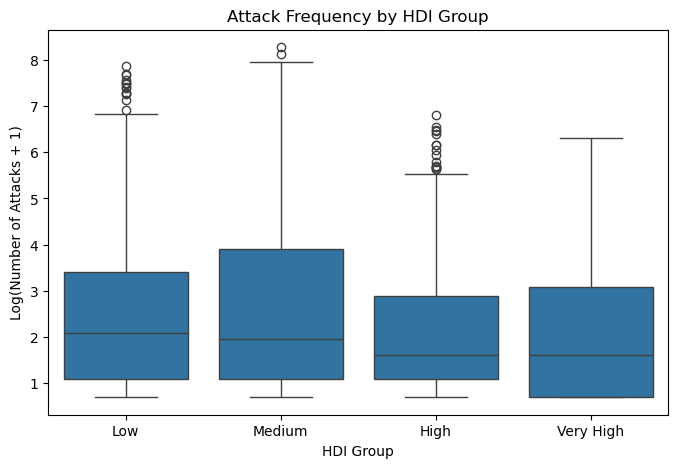

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_ml,x="hdi_group",y="log_attacks")
plt.xlabel("HDI Group")
plt.ylabel("Log(Number of Attacks + 1)")
plt.title("Attack Frequency by HDI Group")
plt.show()

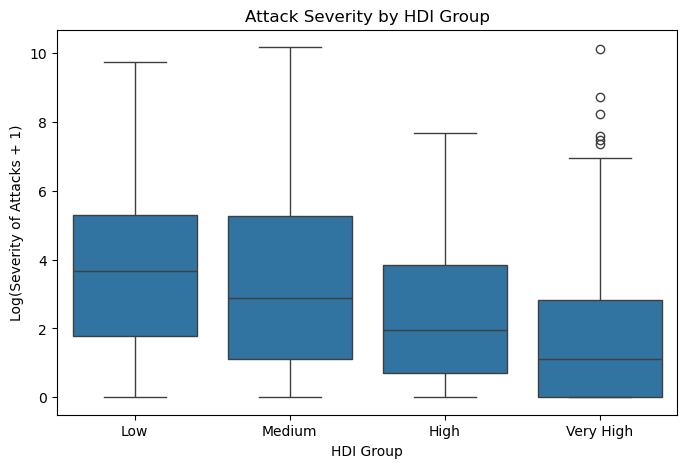

In [91]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_ml,x="hdi_group",y="log_casualties")
plt.xlabel("HDI Group")
plt.ylabel("Log(Severity of Attacks + 1)")
plt.title("Attack Severity by HDI Group")
plt.show()

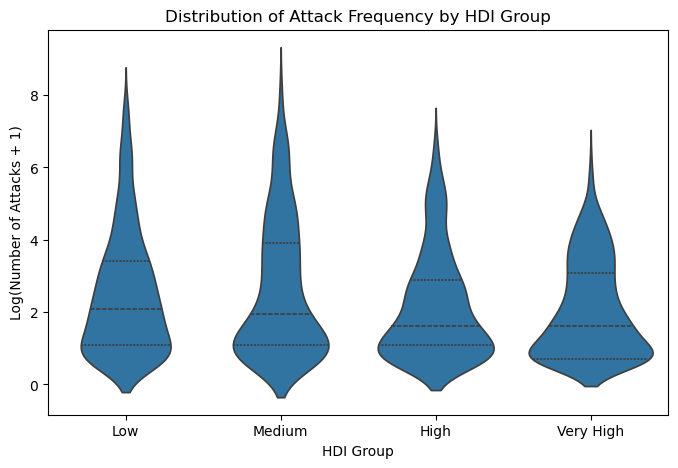

In [25]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df_ml,x="hdi_group",y="log_attacks",inner="quartile")

plt.xlabel("HDI Group")
plt.ylabel("Log(Number of Attacks + 1)")
plt.title("Distribution of Attack Frequency by HDI Group")
plt.show()

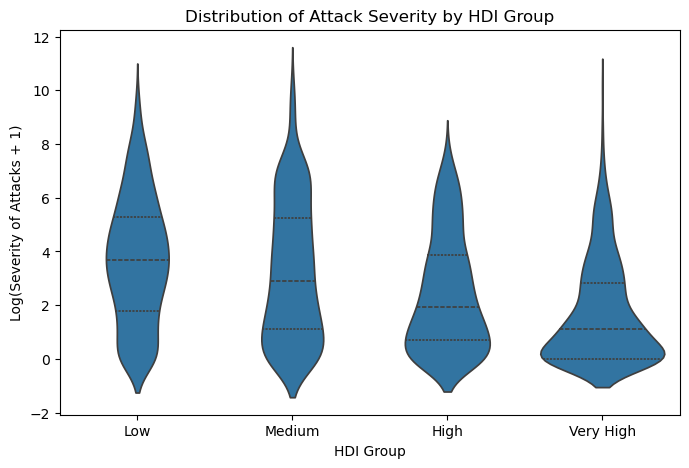

In [90]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df_ml,x="hdi_group",y="log_casualties",inner="quartile")

plt.xlabel("HDI Group")
plt.ylabel("Log(Severity of Attacks + 1)")
plt.title("Distribution of Attack Severity by HDI Group")
plt.show()

In [26]:
df_ml.groupby("hdi_group")["log_attacks"].agg(["mean", "median", "count"])

C:\Users\Mehmet Rafet\AppData\Local\Temp\ipykernel_19740\1970179076.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_ml.groupby("hdi_group")["log_attacks"].agg(["mean", "median", "count"])


,mean,median,count
hdi_group,,,
Low,2.510992,2.079442,722
Medium,2.633049,1.945910,590
High,2.160861,1.609438,505
Very High,2.066162,1.609438,602


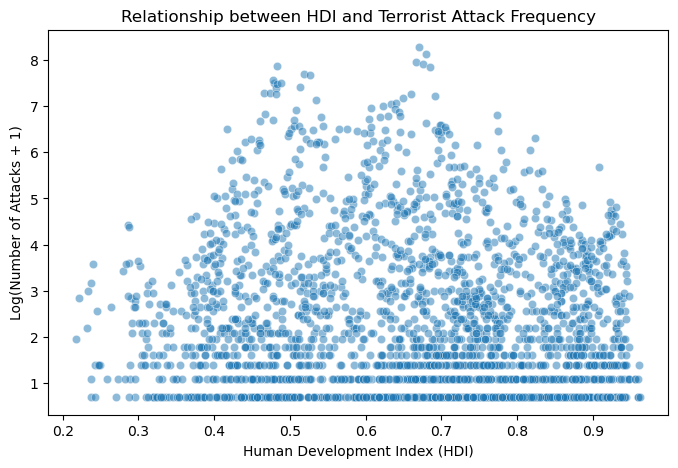

In [27]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_ml,x="hdi",y="log_attacks",alpha=0.5)
plt.xlabel("Human Development Index (HDI)")
plt.ylabel("Log(Number of Attacks + 1)")
plt.title("Relationship between HDI and Terrorist Attack Frequency")
plt.show()

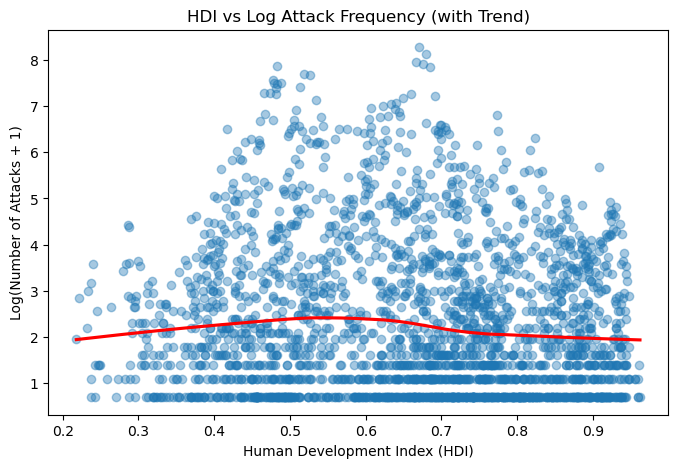

In [28]:
plt.figure(figsize=(8, 5))

sns.regplot(
    data=df_ml,
    x="hdi",
    y="log_attacks",
    scatter_kws={"alpha": 0.4},
    line_kws={"color": "red"},
    lowess=True   # non-linear trend
)

plt.xlabel("Human Development Index (HDI)")
plt.ylabel("Log(Number of Attacks + 1)")
plt.title("HDI vs Log Attack Frequency (with Trend)")
plt.show()

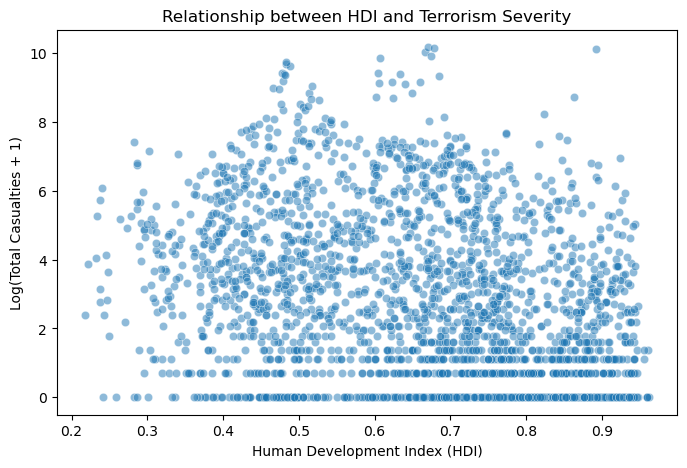

In [29]:
plt.figure(figsize=(8, 5))

sns.scatterplot(
    data=df_ml,
    x="hdi",
    y="log_casualties",
    alpha=0.5
)

plt.xlabel("Human Development Index (HDI)")
plt.ylabel("Log(Total Casualties + 1)")
plt.title("Relationship between HDI and Terrorism Severity")
plt.show()

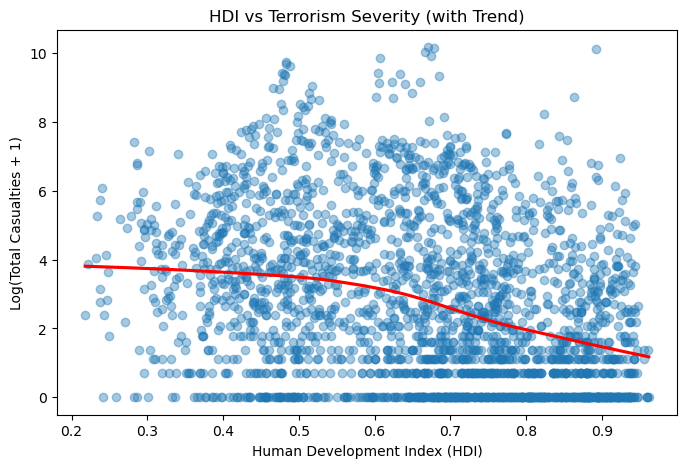

In [30]:
plt.figure(figsize=(8, 5))

sns.regplot(
    data=df_ml,
    x="hdi",
    y="log_casualties",
    scatter_kws={"alpha": 0.4},
    line_kws={"color": "red"},
    lowess=True
)

plt.xlabel("Human Development Index (HDI)")
plt.ylabel("Log(Total Casualties + 1)")
plt.title("HDI vs Terrorism Severity (with Trend)")
plt.show()

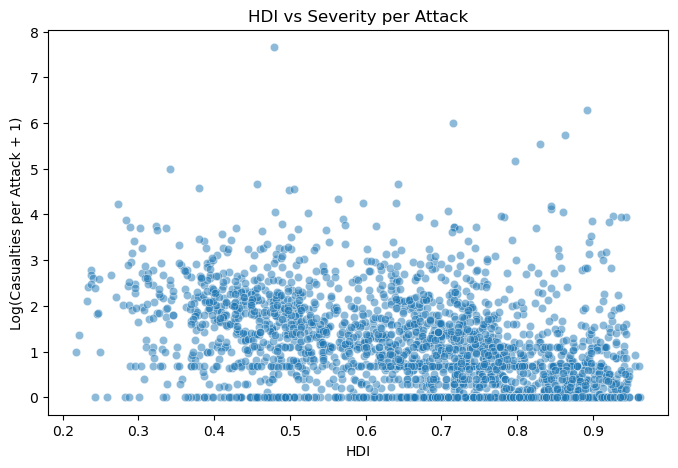

In [31]:
plt.figure(figsize=(8, 5))

sns.scatterplot(
    data=df_ml,
    x="hdi",
    y="log_casualties_per_attack",
    alpha=0.5
)

plt.xlabel("HDI")
plt.ylabel("Log(Casualties per Attack + 1)")
plt.title("HDI vs Severity per Attack")
plt.show()

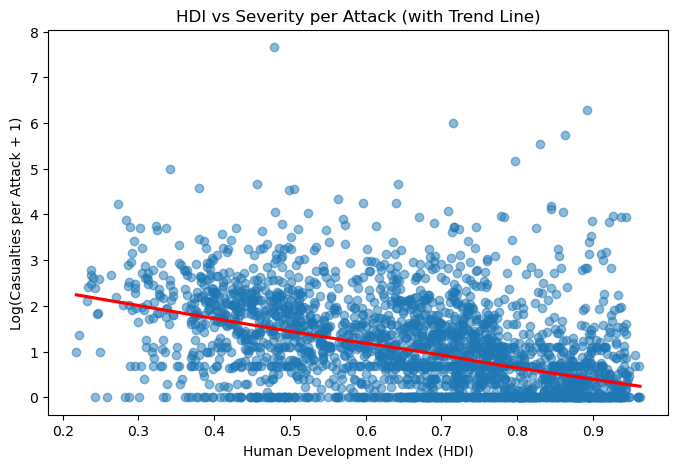

In [32]:
plt.figure(figsize=(8, 5))

sns.regplot(
    data=df_ml,
    x="hdi",
    y="log_casualties_per_attack",
    scatter_kws={"alpha": 0.5},
    line_kws={"color": "red"},
    lowess=True
)

plt.xlabel("Human Development Index (HDI)")
plt.ylabel("Log(Casualties per Attack + 1)")
plt.title("HDI vs Severity per Attack (with Trend Line)")
plt.show()

In [93]:
mean_attacks_log = (df_ml.groupby(["year", "hdi_group","region"])["log_attacks"].mean().reset_index())
mean_casualties_log = (df_ml.groupby(["year", "hdi_group","region"])["log_casualties"].mean().reset_index())


C:\Users\Mehmet Rafet\AppData\Local\Temp\ipykernel_19740\2316654378.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_attacks_log = (df_ml.groupby(["year", "hdi_group","region"])["log_attacks"].mean().reset_index())
C:\Users\Mehmet Rafet\AppData\Local\Temp\ipykernel_19740\2316654378.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_casualties_log = (df_ml.groupby(["year", "hdi_group","region"])["log_casualties"].mean().reset_index())


C:\Users\Mehmet Rafet\AppData\Local\Temp\ipykernel_19740\1040936676.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


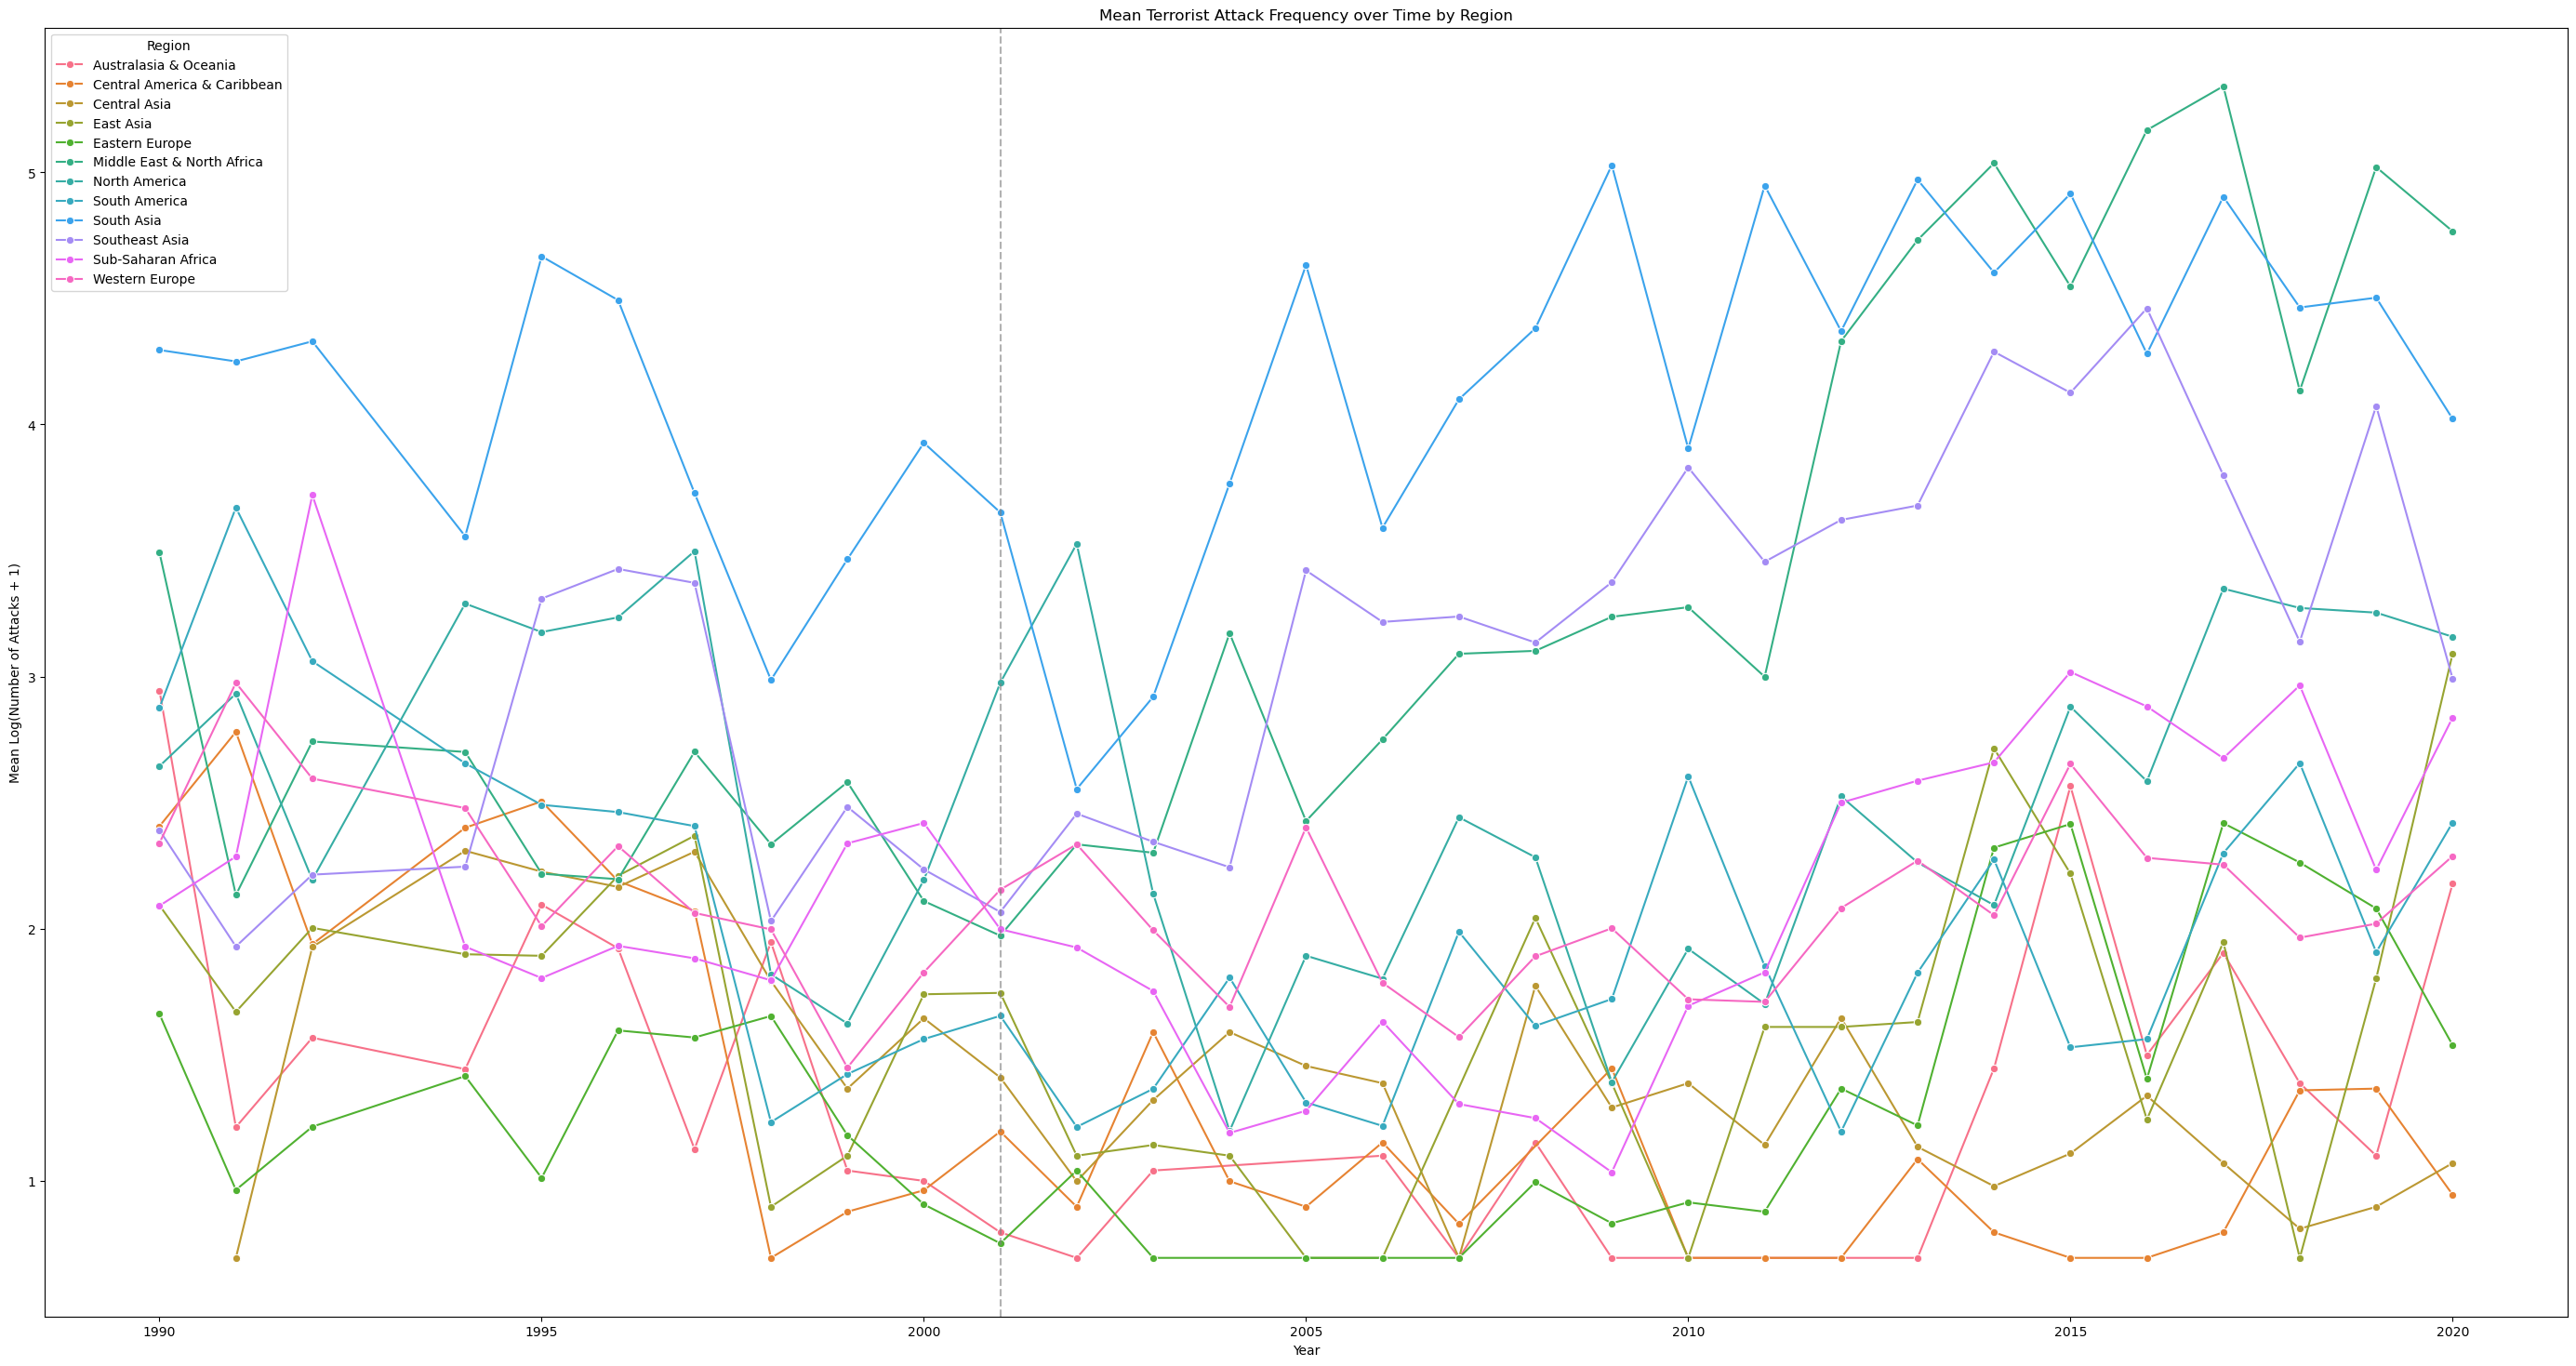

In [99]:
plt.figure(figsize=(35, 18))

sns.lineplot(
    data=mean_attacks_log,
    x="year",
    y="log_attacks",
    hue="region",
    marker="o",
    ci=None

)

plt.xlabel("Year")
plt.ylabel("Mean Log(Number of Attacks + 1)")
plt.title("Mean Terrorist Attack Frequency over Time by Region")
plt.legend(title="Region")
plt.axvline(2001, color="gray", linestyle="--", alpha=0.6)
plt.show()

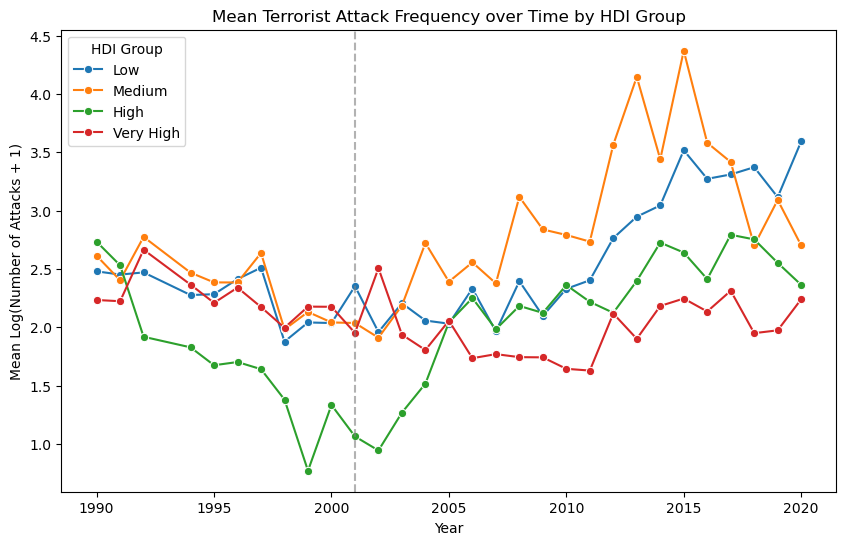

In [34]:
plt.figure(figsize=(10, 6))

sns.lineplot(
    data=mean_attacks_log,
    x="year",
    y="log_attacks",
    hue="hdi_group",
    marker="o"
)

plt.xlabel("Year")
plt.ylabel("Mean Log(Number of Attacks + 1)")
plt.title("Mean Terrorist Attack Frequency over Time by HDI Group")
plt.legend(title="HDI Group")
plt.axvline(2001, color="gray", linestyle="--", alpha=0.6)
plt.show()

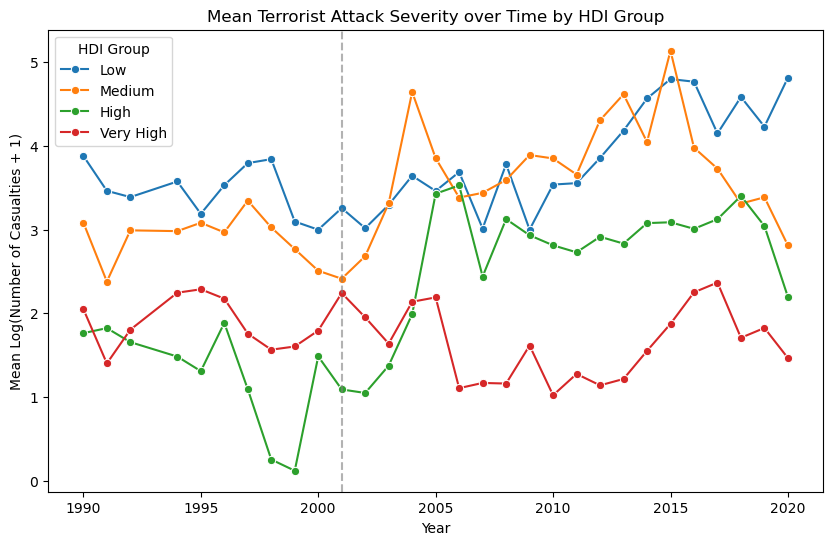

In [92]:
plt.figure(figsize=(10, 6))

sns.lineplot(
    data=mean_casualties_log,
    x="year",
    y="log_casualties",
    hue="hdi_group",
    marker="o"
)

plt.xlabel("Year")
plt.ylabel("Mean Log(Number of Casualties + 1)")
plt.title("Mean Terrorist Attack Severity over Time by HDI Group")
plt.legend(title="HDI Group")
plt.axvline(2001, color="gray", linestyle="--", alpha=0.6)
plt.show()

In [78]:
corr_by_region = (
    df_ml
    .groupby("region")
    .apply(lambda x: x["log_attacks"].corr(x["hdi"]))
    .reset_index(name="corr_log_attacks_hdi")
)

corr_by_region.sort_values("corr_log_attacks_hdi")

C:\Users\Mehmet Rafet\AppData\Local\Temp\ipykernel_19740\3180925388.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x["log_attacks"].corr(x["hdi"]))


,region,corr_log_attacks_hdi
1,Central America & Caribbean,-0.537756
2,Central Asia,-0.296373
11,Western Europe,-0.217122
3,East Asia,-0.208844
7,South America,-0.175565
8,South Asia,-0.165724
5,Middle East & North Africa,-0.095682
4,Eastern Europe,-0.089787
0,Australasia & Oceania,-0.061980
10,Sub-Saharan Africa,0.096242


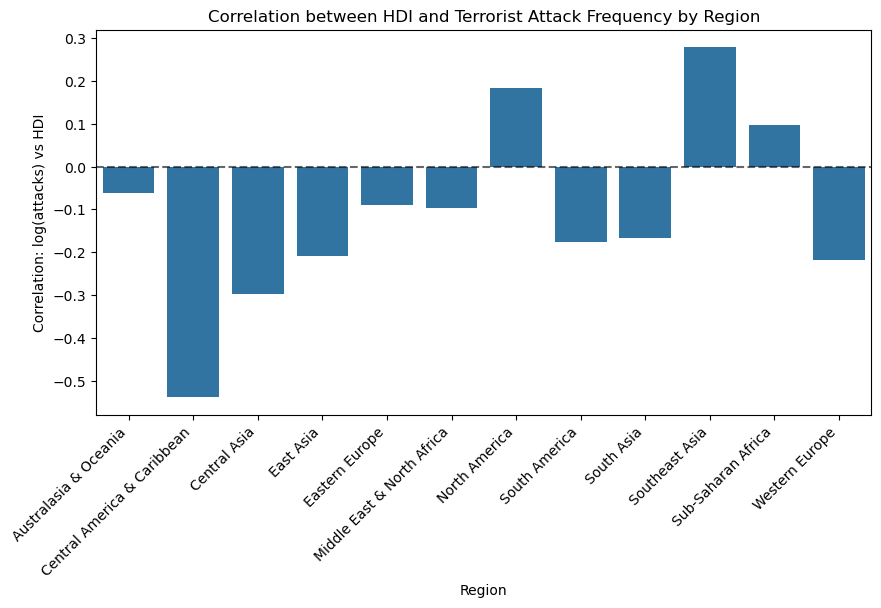

In [36]:
plt.figure(figsize=(10, 5))

sns.barplot(
    data=corr_by_region,
    x="region",
    y="corr_log_attacks_hdi"
)

plt.axhline(0, color="black", linestyle="--", alpha=0.6)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Region")
plt.ylabel("Correlation: log(attacks) vs HDI")
plt.title("Correlation between HDI and Terrorist Attack Frequency by Region")
plt.show()

### Hypothesis Testing

##### Hypothesis 1:
- H₀₁ (Null):
There is no statistically significant relationship between the number of terrorist attacks and the Human Development Index.

- H₁₁ (Alternative):
There is a statistically significant negative relationship between the number of terrorist attacks and the Human Development Index.

In [79]:
from scipy.stats import pearsonr, spearmanr

sub_freq = df_ml[["hdi", "log_attacks"]]

pearson_freq = pearsonr(sub_freq["log_attacks"], sub_freq["hdi"])
spearman_freq = spearmanr(sub_freq["log_attacks"], sub_freq["hdi"])

print("Frequency vs HDI")
print("Pearson r:", pearson_freq.statistic, "p-value:", pearson_freq.pvalue)
print("Spearman rho:", spearman_freq.statistic, "p-value:", spearman_freq.pvalue)

Frequency vs HDI
Pearson r: -0.09432608673437383 p-value: 3.3640956185448964e-06
Spearman rho: -0.09882459275726112 p-value: 1.11634884232921e-06


The results indicate a negative correlation; however, the association does not reach statistical significance. Hence, there is insufficient evidence to reject the null hypothesis.

##### Hypothesis 2:
- H₀₁ (Null):
There is no statistically significant relationship between the severity of terrorist attacks and the Human Development Index.

- H₁₁ (Alternative):
There is a statistically significant negative relationship between the severity of terrorist attacks and the Human Development Index.

In [80]:
sub_sev = df_ml[["hdi", "log_casualties"]]

pearson_sev = pearsonr(sub_sev["log_casualties"], sub_sev["hdi"])
spearman_sev = spearmanr(sub_sev["log_casualties"], sub_sev["hdi"])

print("Severity vs HDI")
print("Pearson r:", pearson_sev.statistic, "p-value:", pearson_sev.pvalue)
print("Spearman rho:", spearman_sev.statistic, "p-value:", spearman_sev.pvalue)

Severity vs HDI
Pearson r: -0.3088064906999881 p-value: 1.315320197789528e-54
Spearman rho: -0.32914980823762147 p-value: 3.2171476103810185e-62


The results indicate a negative correlation; however, the association does not reach statistical significance. Hence, there is insufficient evidence to reject the null hypothesis.

In [37]:
df_ml.to_excel("dsa210project.xlsx",index=False)

In [54]:
df_ml.head()

,country,year,hdi,region,attacks_count,total_casualty,log_attacks,log_casualties,hdi_group,casualties_per_attack,log_casualties_per_attack
0,Afghanistan,1990,0.273,South Asia,2,134.0,1.098612,4.905275,Low,67.000000,4.219508
1,Albania,1990,0.647,Eastern Europe,1,0.0,0.693147,0.000000,Medium,0.000000,0.000000
2,Argentina,1990,0.723,South America,31,2.0,3.465736,1.098612,High,0.064516,0.062520
3,Austria,1990,0.825,Western Europe,1,0.0,0.693147,0.000000,Very High,0.000000,0.000000
4,Belgium,1990,0.816,Western Europe,2,2.0,1.098612,1.098612,Very High,1.000000,0.693147


### Implementing ML Methods

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer


In [56]:
TARGET = "log_attacks"

feature_cols = ["hdi", "year", "country", "region", "hdi_group"]
data = df_ml[feature_cols + [TARGET]].dropna().copy()

X = data[feature_cols]
y = data[TARGET]

In [57]:
cutoff_year = 2012
train = data[data["year"] <= cutoff_year].copy()
test  = data[data["year"] >  cutoff_year].copy()

X_train = train[feature_cols]
y_train = train[TARGET]
X_test  = test[feature_cols]
y_test  = test[TARGET]

preprocessing 

In [60]:
cat_cols = ["country","region","hdi_group"]
num_cols = ["hdi","year"]

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

##### Linear Regression

In [62]:

lin_model = Pipeline(steps=[
    ("prep", preprocess),
    ("model", LinearRegression())
])

lin_model.fit(X_train, y_train)
pred = lin_model.predict(X_test)

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse=np.sqrt(mse)
r2 = r2_score(y_test, pred)

print("MAE:", mae, "RMSE:", rmse, "R2:", r2)

MAE: 1.3091249665435225 RMSE: 1.7529069615707733 R2: 0.1141307609990686


- This regression model yields a low positive R^2 value

##### Decision Tree

In [63]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

tree = Pipeline(steps=[
    ("prep", preprocess),
    ("model", DecisionTreeRegressor(random_state=42))
])

param_grid_tree = {
    "model__max_depth": [3, 5, 8, 12, None],
    "model__min_samples_split": [2, 5, 10, 20],
    "model__min_samples_leaf": [1, 2, 5, 10],
}

gs_tree = GridSearchCV(tree, param_grid_tree, cv=5,
                       scoring="neg_mean_squared_error", n_jobs=-1)
gs_tree.fit(X_train, y_train)

best_tree = gs_tree.best_estimator_
pred_tree = best_tree.predict(X_test)

print("Best params:", gs_tree.best_params_)
print("R2:", r2_score(y_test, pred_tree))

Best params: {'model__max_depth': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2}
R2: 0.34376730608039685


- Again, low, positive R^2 value

##### Random Forest

In [65]:
from sklearn.ensemble import RandomForestRegressor

rf = Pipeline(steps=[
    ("prep", preprocess),
    ("model", RandomForestRegressor(random_state=42, n_jobs=-1))
])

param_grid_rf = {
    "model__n_estimators": [200, 400],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_leaf": [1, 2, 5],
}

gs_rf = GridSearchCV(rf, param_grid_rf, cv=5,
                     scoring="neg_mean_squared_error", n_jobs=-1)
gs_rf.fit(X_train, y_train)

best_rf = gs_rf.best_estimator_
pred_rf = best_rf.predict(X_test)

print("Best params:", gs_rf.best_params_)
print("MAE:", mean_absolute_error(y_test, pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred_rf)))
print("R2:", r2_score(y_test, pred_rf))

Best params: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__n_estimators': 200}
MAE: 0.8992713198891568
RMSE: 1.2429904286484106
R2: 0.5545617998290877


- Yields the lowest RMSE and highest R^2 value, outperforms linear regression and decision tree models.

##### Residual vs HDI

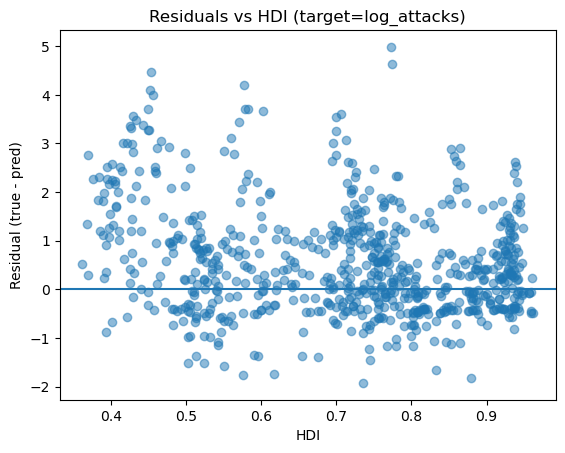

In [66]:
residuals = y_test.values - pred_rf

plt.figure()
plt.scatter(X_test["hdi"], residuals, alpha=0.5)
plt.axhline(0)
plt.xlabel("HDI"); plt.ylabel("Residual (true - pred)")
plt.title(f"Residuals vs HDI (target={TARGET})")
plt.show()